# Multi-target Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
from sklearn.datasets import make_regression

x, y = make_regression(
    n_samples=500, n_features=8, n_informative=8, n_targets=3, noise=30.0
)

In [3]:
x.shape, y.shape

((500, 8), (500, 3))

In [4]:
feature_names = [f'Feature # {i}' for i in range(x.shape[1])]

dfx = pd.DataFrame(
    x, columns=feature_names
)

dfx.head(5)

,Feature # 0,Feature # 1,Feature # 2,Feature # 3,Feature # 4,Feature # 5,Feature # 6,Feature # 7
0,0.511110,-1.238440,0.926158,0.837739,-0.069713,-0.466571,0.673847,0.096787
1,-0.101650,0.333000,0.021271,-0.956027,-1.099317,0.497471,-1.226324,1.211072
2,0.322240,0.567546,-0.774132,-1.125328,0.078272,-0.537235,-0.309283,-0.282478
3,-1.205350,-1.055370,0.647800,1.919123,-1.168752,-0.073463,0.067616,2.445373
4,-0.573225,2.139462,2.076481,-0.866694,-1.961697,0.619480,0.754257,-1.855199


In [5]:
target_names = [f'Target # {i}' for i in range(y.shape[1])]

dfy = pd.DataFrame(
    y, columns=target_names
)

dfy.head(5)

,Target # 0,Target # 1,Target # 2
0,78.490009,124.931967,153.523731
1,-130.006436,-65.709570,-47.959996
2,-83.284112,-119.237490,-148.808124
3,5.997546,84.586193,291.334203
4,159.676750,74.142029,-145.348040


In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((375, 8), (375, 3), (125, 8), (125, 3))

In [7]:
# This code will throw a `ValueError: bad input shape`


# from sklearn.linear_model import SGDRegressor

# rgr = SGDRegressor()
# rgr.fit(x_train, y_train)

# y_pred = rgr.predict(x_test)

## MultiOutput Regressor

In [8]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import SGDRegressor

rgr = MultiOutputRegressor(
    estimator=SGDRegressor(), 
    n_jobs=-1
)
rgr.fit(x_train, y_train)
y_pred = rgr.predict(x_test)

In [9]:
df_pred = pd.DataFrame(
    y_pred, columns=target_names
)

df_pred.head(4)

,Target # 0,Target # 1,Target # 2
0,149.762382,-12.336530,60.694292
1,-171.946382,-239.652778,-185.660044
2,5.426488,107.258200,302.530738
3,6.080888,308.431638,241.819225


In [10]:
df_pred.describe().T

,count,mean,std,min,25%,50%,75%,max
Target # 0,125.0,34.306920,147.359668,-257.026243,-77.345482,17.324678,128.482219,397.138182
Target # 1,125.0,17.456002,120.641229,-239.652778,-65.102881,8.560058,78.417982,403.316400
Target # 2,125.0,8.005350,143.701129,-318.002277,-94.432830,-1.848464,94.619744,440.267602


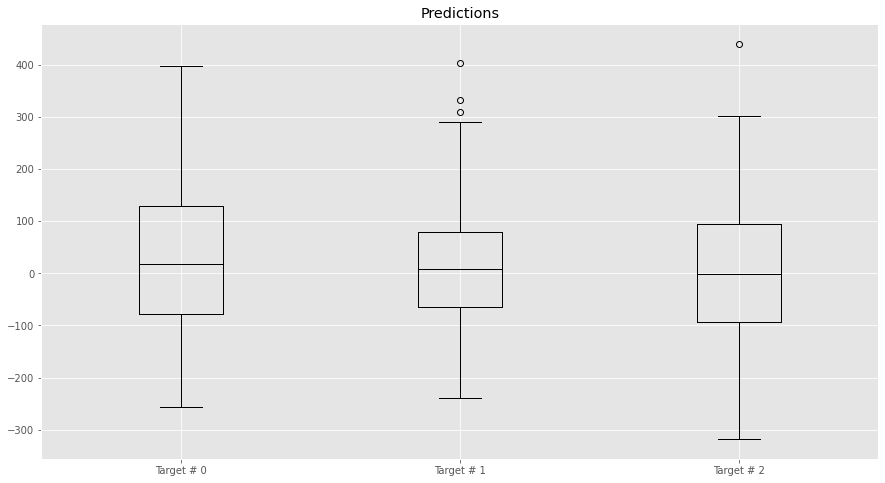

In [11]:
fig, ax = plt.subplots(figsize=(15, 8))

df_pred.plot(
    title='Predictions',
    kind='box',
    color='k',
    ax=ax
)

fig.show()

In [12]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

for t in range(y_train.shape[1]):
    print(
        'Target # {}: MAE={:.2f}, R2={:.2f}'.format(
            t,
            mean_absolute_error(y_test[t], y_pred[t]),
            r2_score(y_test[t], y_pred[t]),
        )
    )

Target # 0: MAE=28.01, R2=0.84
Target # 1: MAE=22.31, R2=0.71
Target # 2: MAE=11.48, R2=0.99


## Regressor Chain

In [13]:
from sklearn.multioutput import RegressorChain
from sklearn.linear_model import Ridge

rgr = RegressorChain(
    base_estimator=Ridge(
        alpha=1
    ), 
    order=[0,1,2],
)
rgr.fit(x_train, y_train)
y_pred = rgr.predict(x_test)

In [14]:
df_pred = pd.DataFrame(
    y_pred, columns=[f'Target # {i}' for i in range(y.shape[1])]
)

df_pred.head(5)

,Target # 0,Target # 1,Target # 2
0,149.416283,-12.116778,60.500127
1,-171.106053,-238.725082,-185.295670
2,5.419850,107.045144,301.899906
3,5.998317,307.166631,240.944917
4,91.915639,-87.066211,-265.202071


In [15]:
df_pred.describe().T

,count,mean,std,min,25%,50%,75%,max
Target # 0,125.0,34.150311,146.855505,-256.393529,-77.041713,17.159657,128.084996,395.844719
Target # 1,125.0,17.453949,120.287826,-238.725082,-64.483998,8.429085,78.189154,402.463678
Target # 2,125.0,8.037628,143.315582,-316.933463,-94.320210,-1.851119,94.573970,439.090120


In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

for t in range(y_train.shape[1]):
    print(
        'Target # {}: MAE={:.2f}, R2={:2f}'.format(
            t,
            mean_absolute_error(y_test[t], y_pred[t]),
            r2_score(y_test[t], y_pred[t]),
        )
    )

Target # 0: MAE=28.12, R2=0.838865
Target # 1: MAE=22.21, R2=0.715727
Target # 2: MAE=11.20, R2=0.985813


In [17]:
for t, estimator in enumerate(rgr.estimators_):
    print(f'\nEstimator for Target # {t}:')
    df_coef = pd.DataFrame(
        zip(
            rgr.estimators_[t].coef_, 
            feature_names + target_names
        ),
        columns=['Coeff', 'Feature']
    )
    print(df_coef)


Estimator for Target # 0:
       Coeff      Feature
0  29.325056  Feature # 0
1  26.818106  Feature # 1
2  85.649404  Feature # 2
3   5.070184  Feature # 3
4  31.073190  Feature # 4
5   5.450657  Feature # 5
6  94.535778  Feature # 6
7  13.859516  Feature # 7

Estimator for Target # 1:
       Coeff      Feature
0   3.373563  Feature # 0
1  -0.130338  Feature # 1
2  91.609424  Feature # 2
3  37.932612  Feature # 3
4  44.065941  Feature # 4
5  36.437354  Feature # 5
6  -4.469544  Feature # 6
7  13.377261  Feature # 7
8   0.064276   Target # 0

Estimator for Target # 2:
       Coeff      Feature
0   3.005745  Feature # 0
1  -1.197618  Feature # 1
2  56.514349  Feature # 2
3  77.580493  Feature # 3
4  54.117677  Feature # 4
5  -0.647124  Feature # 5
6  -7.763930  Feature # 6
7  69.406391  Feature # 7
8   0.075349   Target # 0
9   0.099610   Target # 1


In [18]:
pd.DataFrame(
    zip(
        rgr.estimators_[0].coef_, 
        feature_names + target_names
    ),
    columns=['Coeff', 'Feature']
)[
    ['Feature', 'Coeff']
].style.bar(
    subset=['Coeff'], align='mid', color='#AAAAAA'
)

,Feature,Coeff
0,Feature # 0,29.325056
1,Feature # 1,26.818106
2,Feature # 2,85.649404
3,Feature # 3,5.070184
4,Feature # 4,31.073190
5,Feature # 5,5.450657
6,Feature # 6,94.535778
7,Feature # 7,13.859516


In [19]:
pd.DataFrame(
    zip(
        rgr.estimators_[-1].coef_, 
        feature_names + target_names
    ),
    columns=['Coeff', 'Feature']
)[
    ['Feature', 'Coeff']
].style.bar(
    subset=['Coeff'], align='mid', color='#AAAAAA'
)

,Feature,Coeff
0,Feature # 0,3.005745
1,Feature # 1,-1.197618
2,Feature # 2,56.514349
3,Feature # 3,77.580493
4,Feature # 4,54.117677
5,Feature # 5,-0.647124
6,Feature # 6,-7.763930
7,Feature # 7,69.406391
8,Target # 0,0.075349
9,Target # 1,0.099610


## Multi-target Regression

**Multiclass classification**: classification task with more than two classes. Each sample can only be labelled as one class. For example, classification using features extracted from a set of images of fruit, where each image may either be of an orange, an apple, or a pear. Each image is one sample and is labelled as one of the 3 possible classes.

**Multilabel classification**: classification task labelling each sample with x labels from n_classes. For example, prediction of the topics relevant to a text document or video. The document or video may be about one of ‘religion’, ‘politics’, ‘finance’ or ‘education’, several of the topic classes or all of the topic classes.

In [20]:
from sklearn.datasets import make_multilabel_classification

x, y = make_multilabel_classification(
    n_samples=500, n_features=8, n_classes=3, n_labels=2
)

In [21]:
x.shape, y.shape

((500, 8), (500, 3))

In [22]:
np.unique(y)

array([0, 1])

In [23]:
y[:,-1] = y[:,0]

In [24]:
feature_names = [f'Feature # {i}' for i in range(x.shape[1])]
target_names = [f'Target # {i}' for i in range(y.shape[1])]

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [26]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier

clf = MultiOutputClassifier(
    estimator=GradientBoostingClassifier(
        n_estimators=500,
        learning_rate=0.01,
        subsample=0.8,
    ),
    n_jobs=-1
)
clf.fit(x_train, y_train)
y_pred_multioutput = clf.predict(x_test)

In [27]:
from sklearn.multioutput import ClassifierChain
from sklearn.ensemble import GradientBoostingClassifier

clf = ClassifierChain(
    base_estimator=GradientBoostingClassifier(
        n_estimators=500,
        learning_rate=0.01,
        subsample=0.8,
    ),
    order=[0,1,2]
)
clf.fit(x_train, y_train)
y_pred_chain = clf.predict(x_test)

In [28]:
pd.DataFrame(
    zip(
        clf.estimators_[-2].feature_importances_, 
        feature_names + target_names
    ),
    columns=['Coeff', 'Feature']
)[
    ['Feature', 'Coeff']
].style.bar(
    subset=['Coeff'], align='mid', color='#AAAAAA'
)

,Feature,Coeff
0,Feature # 0,0.065790
1,Feature # 1,0.054041
2,Feature # 2,0.197296
3,Feature # 3,0.182702
4,Feature # 4,0.134703
5,Feature # 5,0.044692
6,Feature # 6,0.043445
7,Feature # 7,0.098395
8,Target # 0,0.178937


In [29]:
pd.DataFrame(
    zip(
        clf.estimators_[-1].feature_importances_, 
        feature_names + target_names
    ),
    columns=['Coeff', 'Feature']
)[
    ['Feature', 'Coeff']
].style.bar(
    subset=['Coeff'], align='mid', color='#AAAAAA'
)

,Feature,Coeff
0,Feature # 0,0.000000
1,Feature # 1,0.000000
2,Feature # 2,0.000000
3,Feature # 3,0.000000
4,Feature # 4,0.000000
5,Feature # 5,0.000000
6,Feature # 6,0.000000
7,Feature # 7,0.000000
8,Target # 0,1.000000
9,Target # 1,0.000000


In [30]:
from sklearn.metrics import f1_score

print(
    'F1-Score; MultiOutputClassifier={:.2f}, ClassifierChain={:.2f}'.format(
        f1_score(y_test, y_pred_multioutput, average='macro'),
        f1_score(y_test, y_pred_chain, average='macro'),
    )
)

F1-Score; MultiOutputClassifier=0.75, ClassifierChain=0.73


## One-Vs-The-Rest

In [31]:
from sklearn.datasets import make_classification

x, y = make_classification(
    n_samples=5000, n_features=15, n_informative=8, n_redundant=2, n_classes=4, class_sep=0.5, # 0.005,
)

In [32]:
x.shape, y.shape

((5000, 15), (5000,))

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(
    estimator=LogisticRegression(solver='saga')
)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy_score(y_test, y_pred)

0.4592

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier

clf = OneVsOneClassifier(
    estimator=LogisticRegression(solver='saga')
)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy_score(y_test, y_pred)

0.4704

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OutputCodeClassifier

clf = OutputCodeClassifier(
    estimator=LogisticRegression(solver='saga'),
    code_size=0.8
)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy_score(y_test, y_pred)

0.3392

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OutputCodeClassifier

clf = OutputCodeClassifier(
    estimator=LogisticRegression(solver='saga'),
    code_size=0.6
)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy_score(y_test, y_pred)

0.3368

## Calibration

For a perfectly calibrated model, we should get the following 45° line whenever we plot the % of samples in the target class versus the classifier's predicted probabilities.

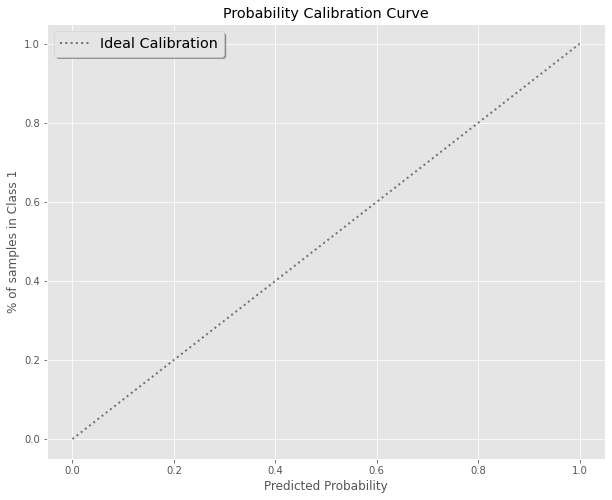

In [38]:
from sklearn.calibration import calibration_curve

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.plot(
    [0, 1], [0, 1], 
    linestyle=':', 
    lw=2, color='k',
    label='Ideal Calibration', alpha=0.5
)

ax.set_title('Probability Calibration Curve')
ax.set_xlabel('Predicted Probability')
ax.set_ylabel('% of samples in Class 1')

ax.legend(loc="upper left", fontsize='x-large', shadow=True)

fig.show()

In [39]:
from sklearn.datasets import make_classification

x, y = make_classification(
    n_samples=50000, n_features=15, n_informative=5, n_redundant=10, n_classes=2, class_sep=0.001
)

x.shape, y.shape

((50000, 15), (50000,))

In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [41]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred_proba = clf.predict_proba(x_test)[:,-1]

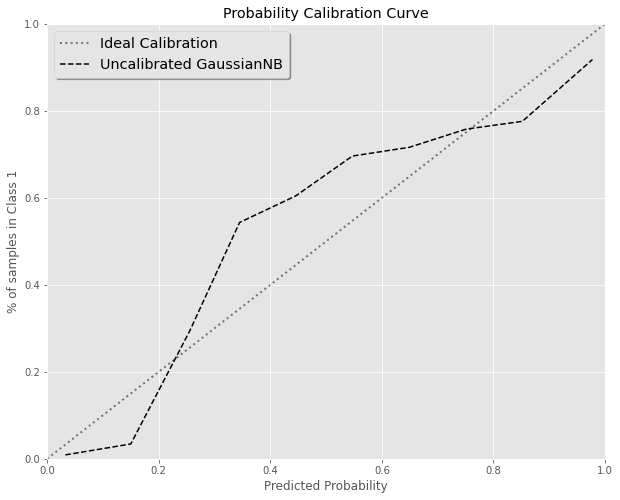

In [42]:
from sklearn.calibration import calibration_curve

fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_pred_proba, n_bins=10)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.plot(
    [0, 1], [0, 1], 
    linestyle=':', 
    lw=2, color='k',
    label='Ideal Calibration', alpha=0.5
)

ax.plot(
    mean_predicted_value, fraction_of_positives, "--", label='Uncalibrated GaussianNB', color='k'
)

ax.set_title('Probability Calibration Curve')
ax.set_xlabel('Predicted Probability')
ax.set_ylabel('% of samples in Class 1')
ax.set_xlim((0,1))
ax.set_ylim((0,1))

ax.legend(loc="upper left", fontsize='x-large', shadow=True)

fig.show()

In [43]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB

clf_calib = CalibratedClassifierCV(GaussianNB(), cv=3, method='isotonic')
clf_calib.fit(x_train, y_train)
y_pred_calib = clf_calib.predict(x_test)
y_pred_proba_calib = clf_calib.predict_proba(x_test)[:,-1]

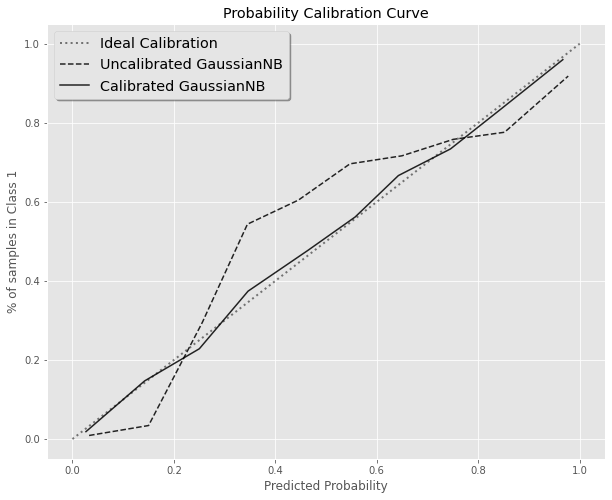

In [44]:
from sklearn.calibration import calibration_curve

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.plot(
    [0, 1], [0, 1], 
    linestyle=':', 
    lw=2, color='k',
    label='Ideal Calibration', alpha=0.5
)

fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_pred_proba, n_bins=10)

ax.plot(
    mean_predicted_value, fraction_of_positives, "--", label='Uncalibrated GaussianNB', color='k', alpha=0.85
)

fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_pred_proba_calib, n_bins=10)

ax.plot(
    mean_predicted_value, fraction_of_positives, "-", label='Calibrated GaussianNB', color='k', alpha=0.85
)

ax.set_title('Probability Calibration Curve')
ax.set_xlabel('Predicted Probability')
ax.set_ylabel('% of samples in Class 1')

ax.legend(loc="upper left", fontsize='x-large', shadow=True)

fig.show()

# Calculating the precision @ k

In [45]:
def precision_at_k_score(y_true, y_pred_proba, k=1000, pos_label=1):
    topk = [
        y_true_ == pos_label 
        for y_true_, y_pred_proba_ 
        in sorted(
            zip(y_true, y_pred_proba), 
            key=lambda y: y[1], 
            reverse=True
        )[:k]
    ]
    return sum(topk) / len(topk)

In [46]:
precision_at_k_score(y_test, y_pred_proba, k=500)

0.994

In [47]:
for k in 1000, 1500, 3000, 6000:
    print(
        'precision @ k={:,}: {:.2%}'.format(
            k, precision_at_k_score(y_test, y_pred_proba, k=k)
        )
    )

precision @ k=1,000: 97.70%
precision @ k=1,500: 95.67%
precision @ k=3,000: 88.90%
precision @ k=6,000: 78.78%


In [48]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.820553049617572